In [ ]:
import io
import numpy as np
import pandas as pd
import scipy
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('stocks-csv.csv', index_col='Date',parse_dates=True)
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
df = df.rename(columns={"T":"T_comp"})

In [ ]:
df.head()

,AAPL,BA,T_comp,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


### NULL/Empty cells

In [ ]:
df.isna().any()

AAPL      False
BA        False
T_comp    False
MGM       False
AMZN      False
IBM       False
TSLA      False
GOOG      False
sp500     False
dtype: bool

In [ ]:
df.isnull().sum()

AAPL      0
BA        0
T_comp    0
MGM       0
AMZN      0
IBM       0
TSLA      0
GOOG      0
sp500     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T_comp  2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


##Searching for Outliers


In [ ]:
df['AAPL'].max()

455.60998499999994

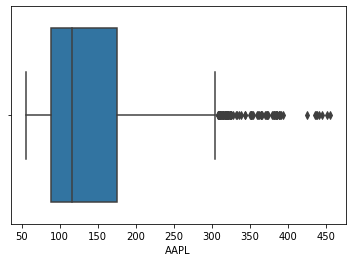

In [ ]:
sb.boxplot(x=df.AAPL)

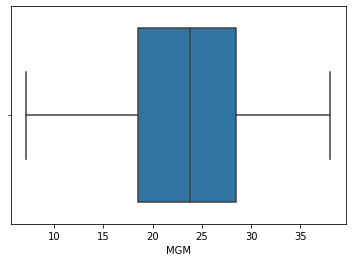

In [ ]:
sb.boxplot(x=df.MGM)

In [ ]:
df['TSLA'].max()


1643.0

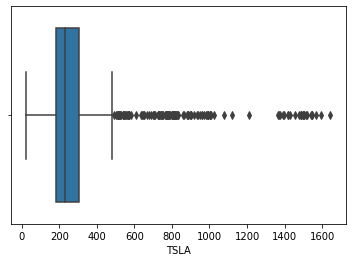

In [ ]:
sb.boxplot(x=df.TSLA)

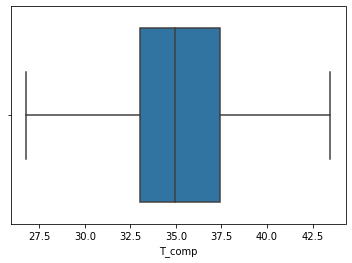

In [ ]:
sb.boxplot(x=df.T_comp)

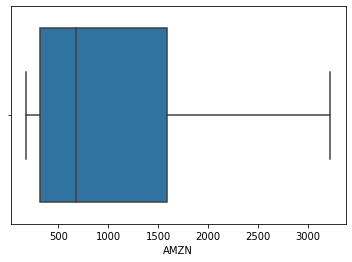

In [ ]:
sb.boxplot(x=df.AMZN)

##Analysing Outliers


In [ ]:
df['TSLA'].std()

210.98800293601454

In [ ]:
df["TSLA"][(np.abs(stats.zscore(df)) < 210.98 ).all(axis=1)].head(10)

Date
2012-01-12    28.250000
2012-01-13    22.790001
2012-01-17    26.600000
2012-01-18    26.809999
2012-01-19    26.760000
2012-01-20    26.600000
2012-01-23    26.770000
2012-01-24    27.420000
2012-01-25    27.969999
2012-01-26    28.940001
Name: TSLA, dtype: float64

In [1]:
#ADF
#KPSS

###Percentile Method

In [ ]:
max_threshold = df['TSLA'].quantile(0.85)
max_threshold

341.3650024

In [ ]:
#no. of pos outliers
df['TSLA'][df['TSLA']>max_threshold].count()

324

In [ ]:
df['TSLA'].min()

22.790001

In [ ]:
min_threshold = df['TSLA'].quantile(0.0009)
min_threshold

26.24133

In [ ]:
df['TSLA'][df['TSLA']>min_threshold].count()

2157

In [ ]:
df.head()

,AAPL,BA,T_comp,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
# REMOVE OUTLIERS
new_df = df[(df['TSLA']<max_threshold) & (df['TSLA']>min_threshold)]
new_df

,AAPL,BA,T_comp,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
2012-01-20,60.042858,75.519997,30.510000,12.640000,190.929993,188.520004,26.600000,291.900879,1315.380005
...,...,...,...,...,...,...,...,...,...
2019-12-03,259.450012,352.079987,37.549999,31.620001,1769.959961,132.119995,336.200012,1295.280029,3093.199951
2019-12-04,261.739990,348.839996,38.099998,31.770000,1760.689941,131.990005,333.029999,1320.540039,3112.760010
2019-12-05,265.579987,345.679993,38.189999,31.930000,1740.479980,131.910004,330.369995,1328.130005,3117.429932


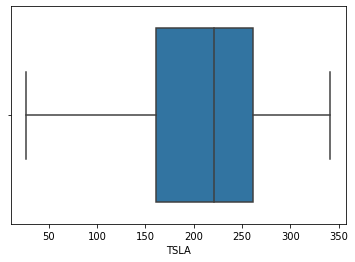

In [ ]:
sb.boxplot(x=new_df.TSLA)

#Plotting Dfs

Text(0.5, 1.0, 'W outliers')

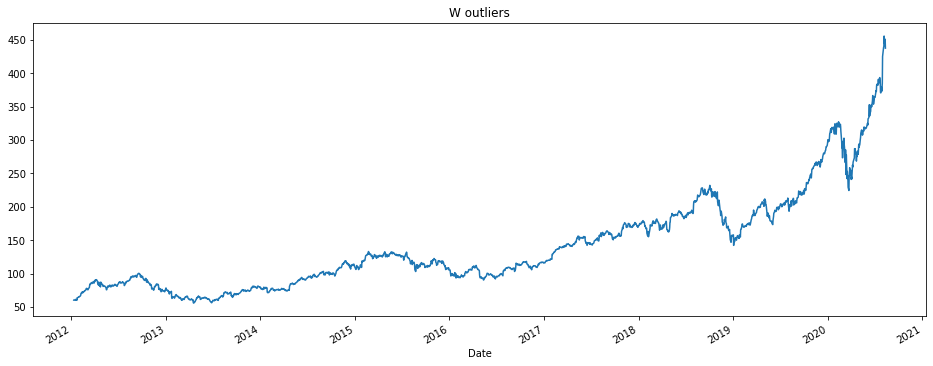

In [ ]:
 df['AAPL'].plot(figsize=(16,6))
 plt.title('W outliers')

Text(0.5, 1.0, 'W/o outliers')

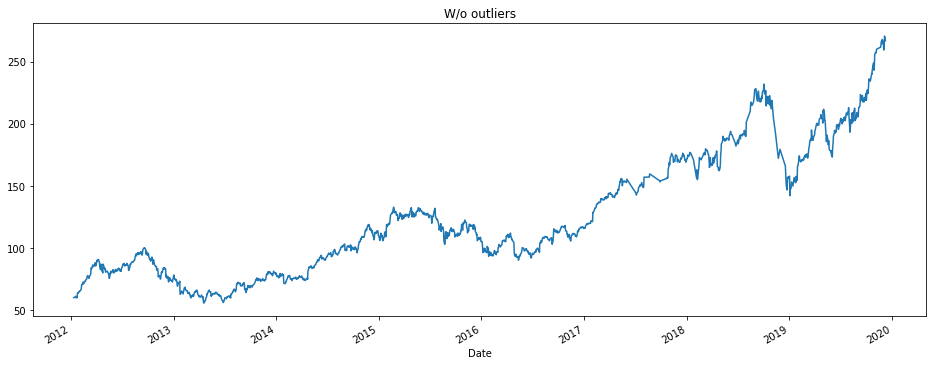

In [ ]:
new_df['AAPL'].plot(figsize=(16,6))
plt.title("W/o outliers")

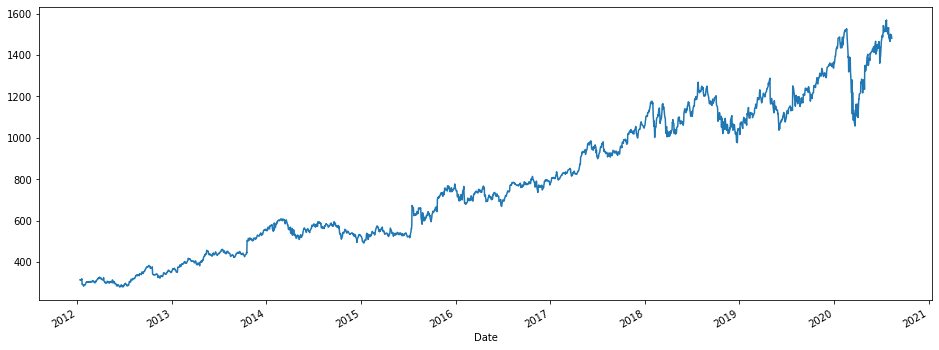

In [ ]:
df['GOOG'].plot(figsize=(16,6))

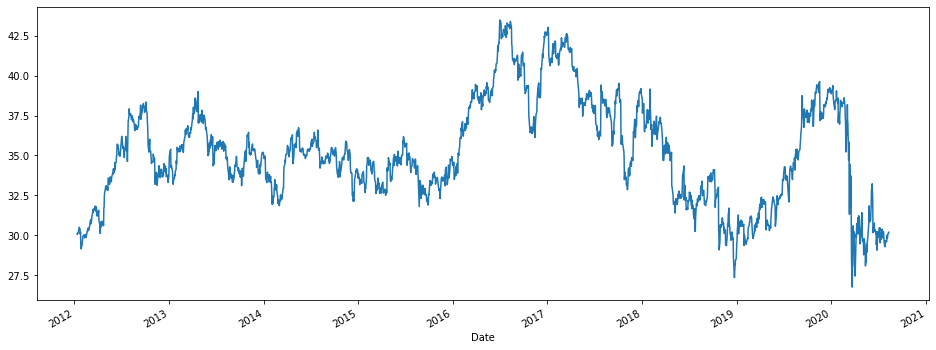

In [ ]:
df['T_comp'].plot(figsize=(16,6))

Text(0.5, 1.0, 'W/o outliers')

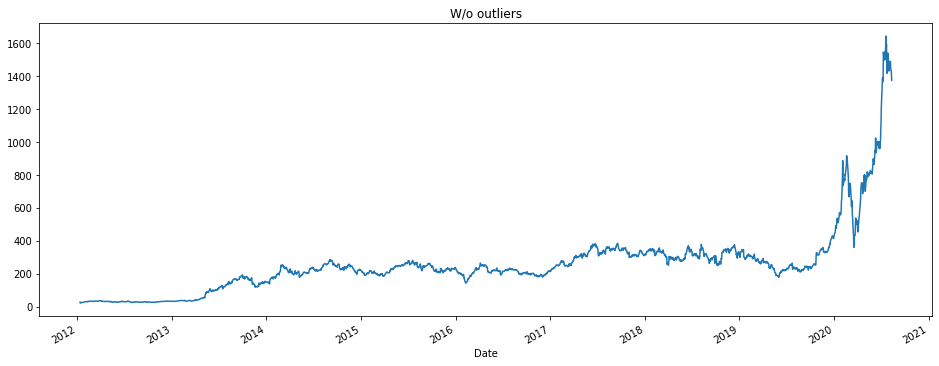

In [ ]:
df['TSLA'].plot(figsize=(16,6))
plt.title('W/o outliers')

Text(0.5, 1.0, 'W/o outliers')

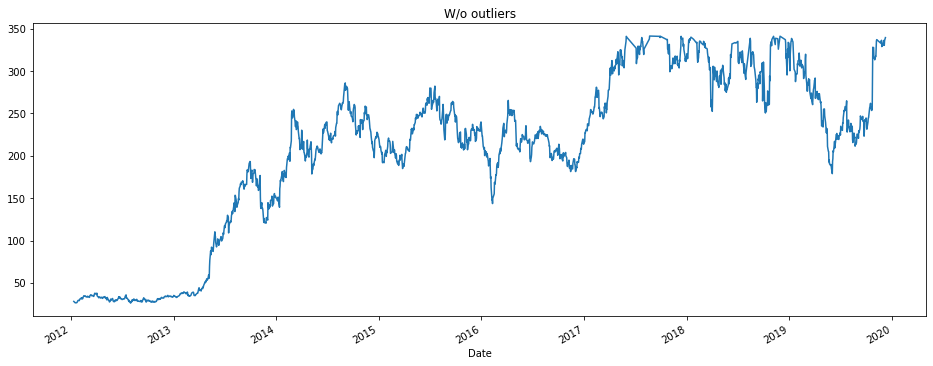

In [ ]:
new_df['TSLA'].plot(figsize=(16,6))
plt.title('W/o outliers')

In [ ]:
from matplotlib.pyplot import figure

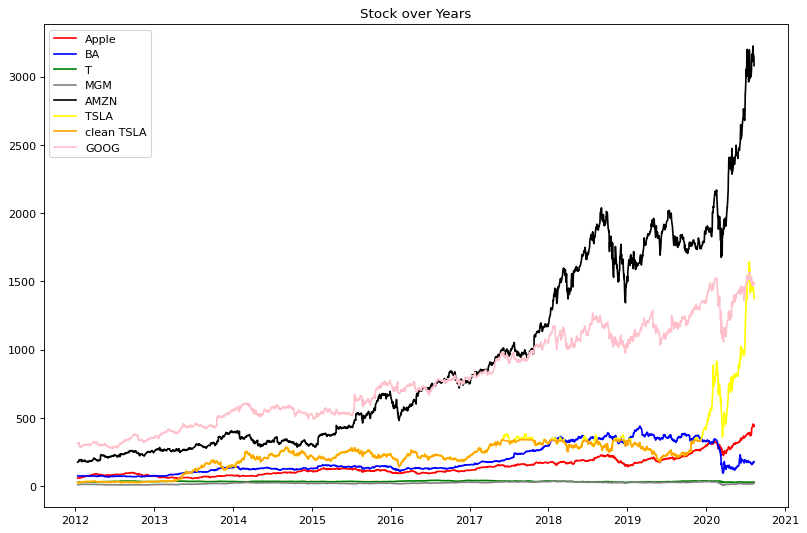

In [ ]:
figure(figsize=(12,8), dpi=80)
plt.plot(df['AAPL'],c='red',label='Apple')
plt.plot(df['BA'],c='blue',label='BA')
plt.plot(df['T_comp'],c='green',label='T')
plt.plot(df['MGM'],c='grey',label='MGM')
plt.plot(df['AMZN'],c='black',label='AMZN')
plt.plot(df['TSLA'],c='yellow',label='TSLA')
plt.plot(new_df['TSLA'],c='orange',label='clean TSLA')
plt.plot(df['GOOG'],c='pink',label='GOOG')
plt.legend(loc='best')
plt.title("Stock over Years")
plt.show()

In [ ]:
df.head()

,AAPL,BA,T_comp,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
#rolling mean
df.rolling(7).mean().head(15)

,AAPL,BA,T_comp,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-23,60.621837,75.285713,30.300000,12.577143,185.274283,182.828574,26.368571,307.931510,1304.597151
2012-01-24,60.601837,75.264285,30.295714,12.724286,186.855713,184.454287,26.250000,304.465219,1307.332868
2012-01-25,61.149796,75.438571,30.315714,12.832857,188.195714,186.250000,26.990000,300.515739,1312.614310


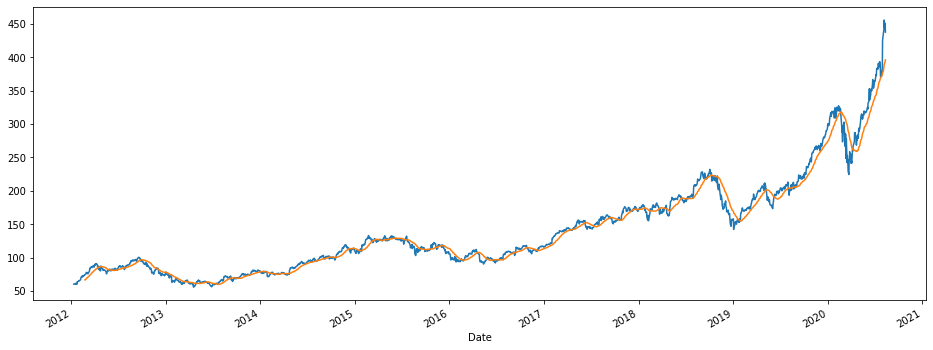

In [ ]:
 df['AAPL'].plot(figsize=(16,6))
 df.rolling(window=30).mean()['AAPL'].plot()

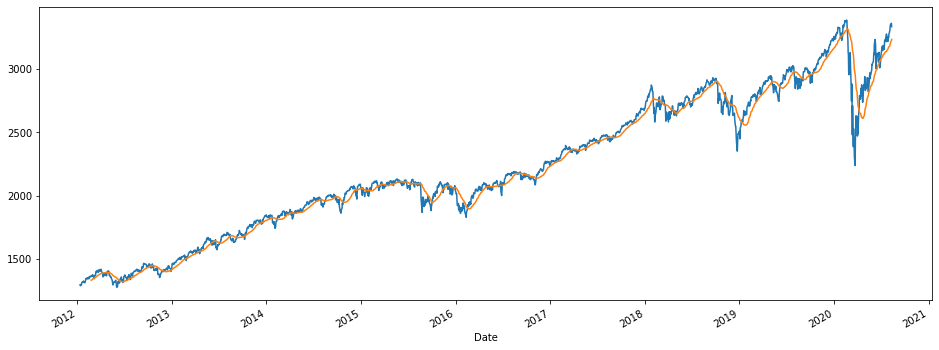

In [ ]:
 df['sp500'].plot(figsize=(16,6))
 df.rolling(window=30).mean()['sp500'].plot()

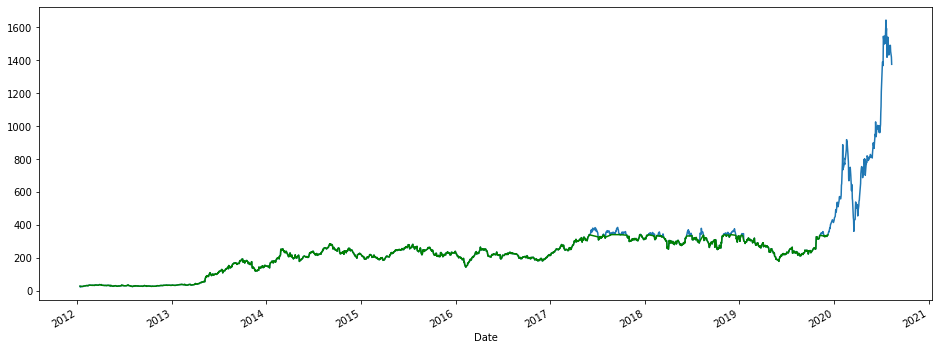

In [ ]:
df['TSLA'].plot(figsize=(16,6))
new_df['TSLA'].plot(c='green')

In [ ]:
#tranformation 
#log,rolling avg, seasonal transformation, 
